ABOUT PROJECT ::
GIVEN MARKETING DATA OUR TASK IS TO SEGMENT THE CUSTOMERS BASED ON THEIR VARIOUS PREFENCES AND PUT THEM IN CLUSTERS.
AS DATASCIENTIST WE ARE TO COME UP WITH A MODEL THAT GROUPS CUSTOMERS BASED ON THEIR INTERESTS

In [32]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [33]:
df = pd.read_csv("C:\\Datasets\\General_Datasets\\marketing_campaign.csv",sep='\t')

In [34]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [35]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [36]:
df['Income'] = df['Income'].fillna(df['Income'].mean()) # REPLACING NULL VALUES IN THE INCOME COLUMN

In [37]:
# Creating a new column that represents the customers current age,a new column for total number of children
df['Age'] = 2023 - df['Year_Birth']
df['Total_Children'] = df['Kidhome'] +df['Teenhome']

In [38]:
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [39]:
# Get a general statistical analysis of our data 
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196,0.950446
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,0.751803
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,3.000000


In [40]:
# Since this is a clustering demo ,I will do basic visualization and skip right into the clustering

# BASIC VISUALIZATIONS

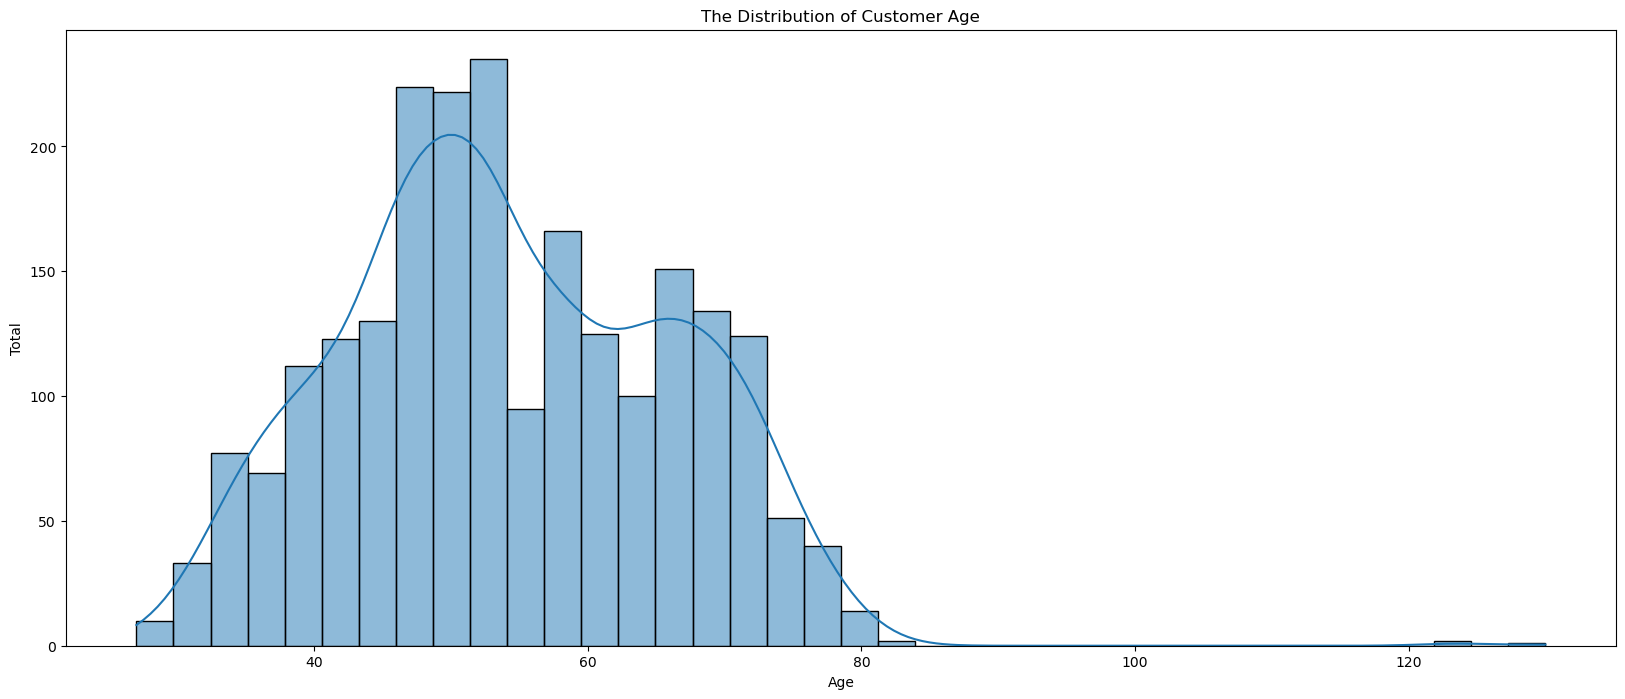

In [41]:
# Plot the distribution of age 
plt.figure(figsize=(20,8))
sns.histplot(x='Age',data=df,kde=True)
plt.ylabel('Total')
plt.title("The Distribution of Customer Age")
plt.show() # A majority of our customers are aged between 45-55

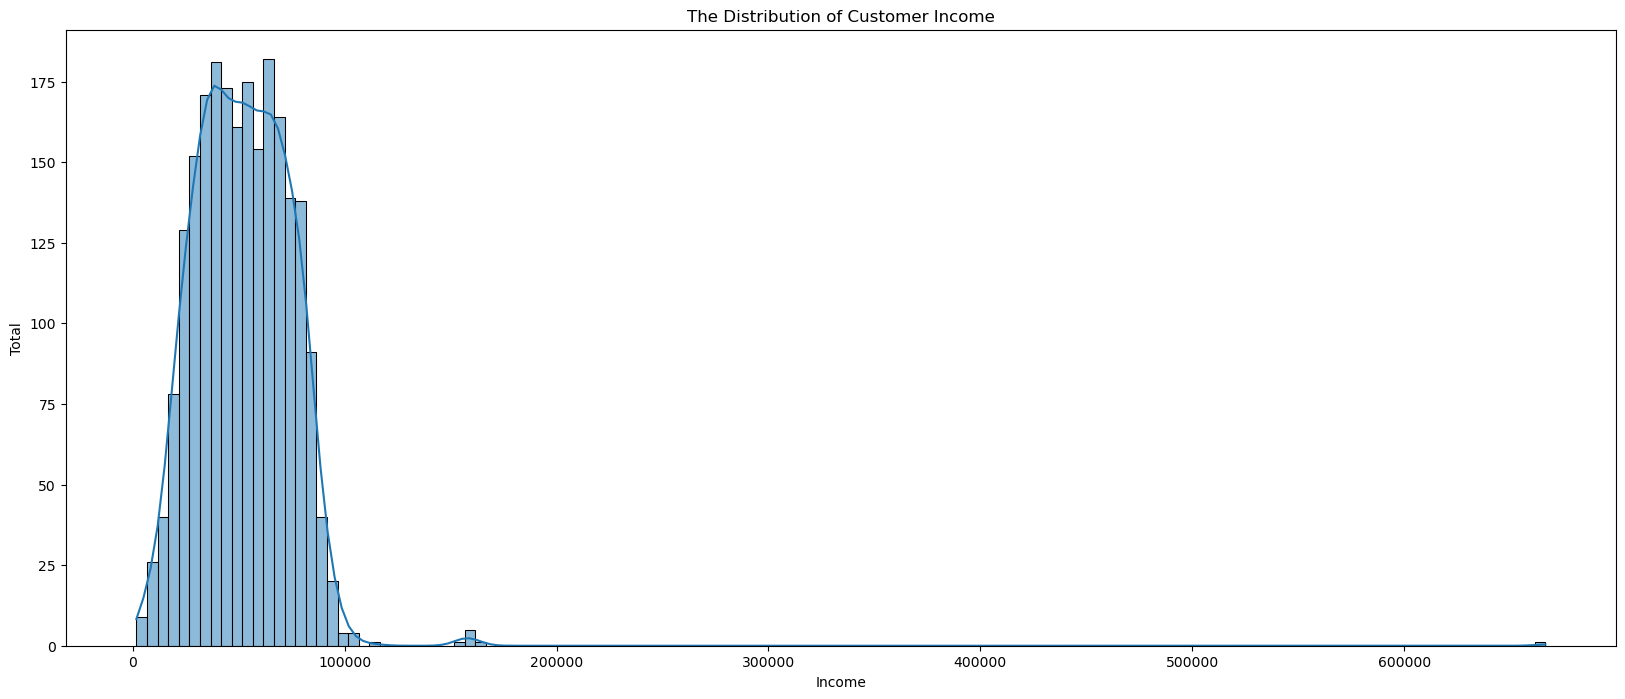

In [42]:
plt.figure(figsize=(20,8))
sns.histplot(x='Income',data=df,kde=True)
plt.ylabel('Total')
plt.title("The Distribution of Customer Income")
plt.show() # A majority of our customers earn 9000

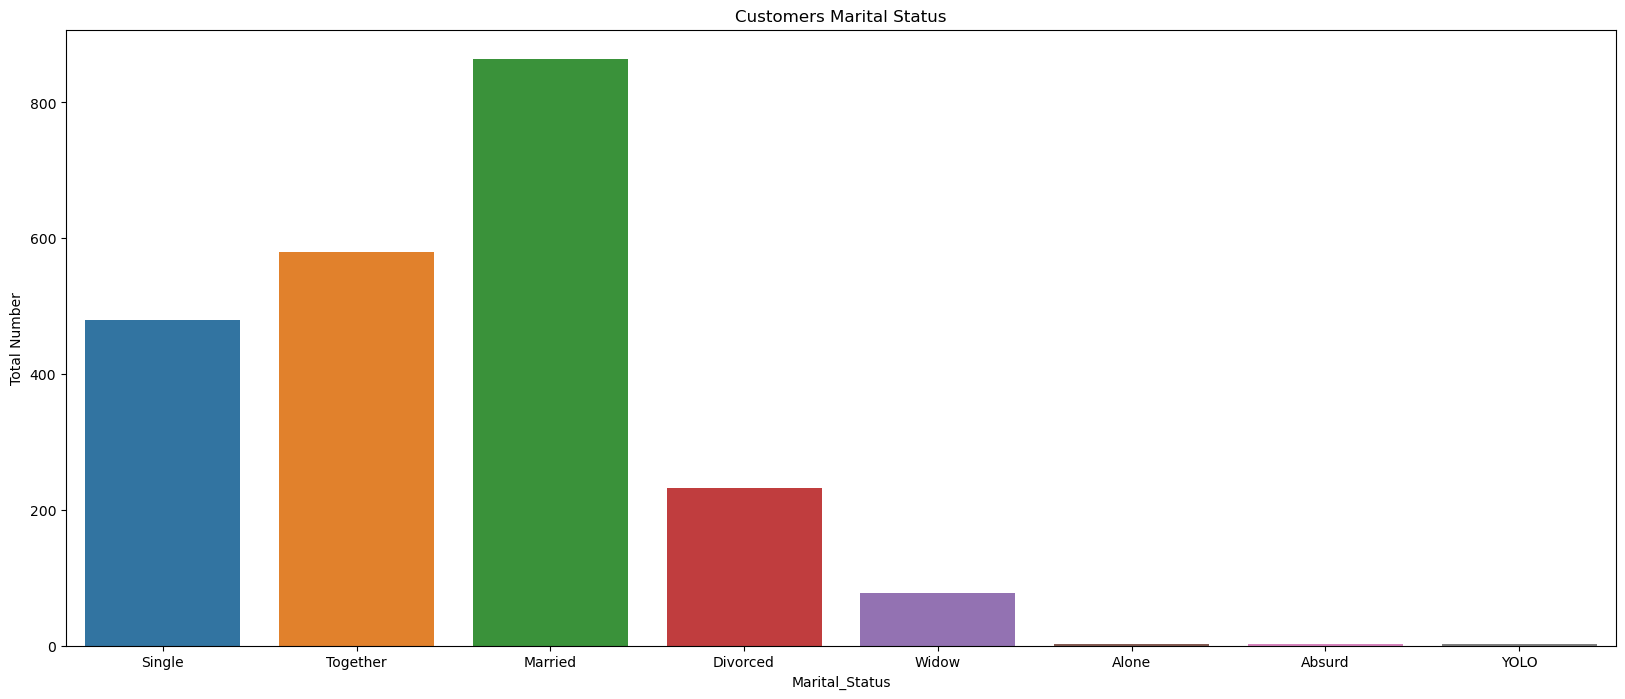

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(x='Marital_Status',data=df)
plt.ylabel("Total Number")
plt.title("Customers Marital Status")
plt.show() # Majority of the CUstomers are married 

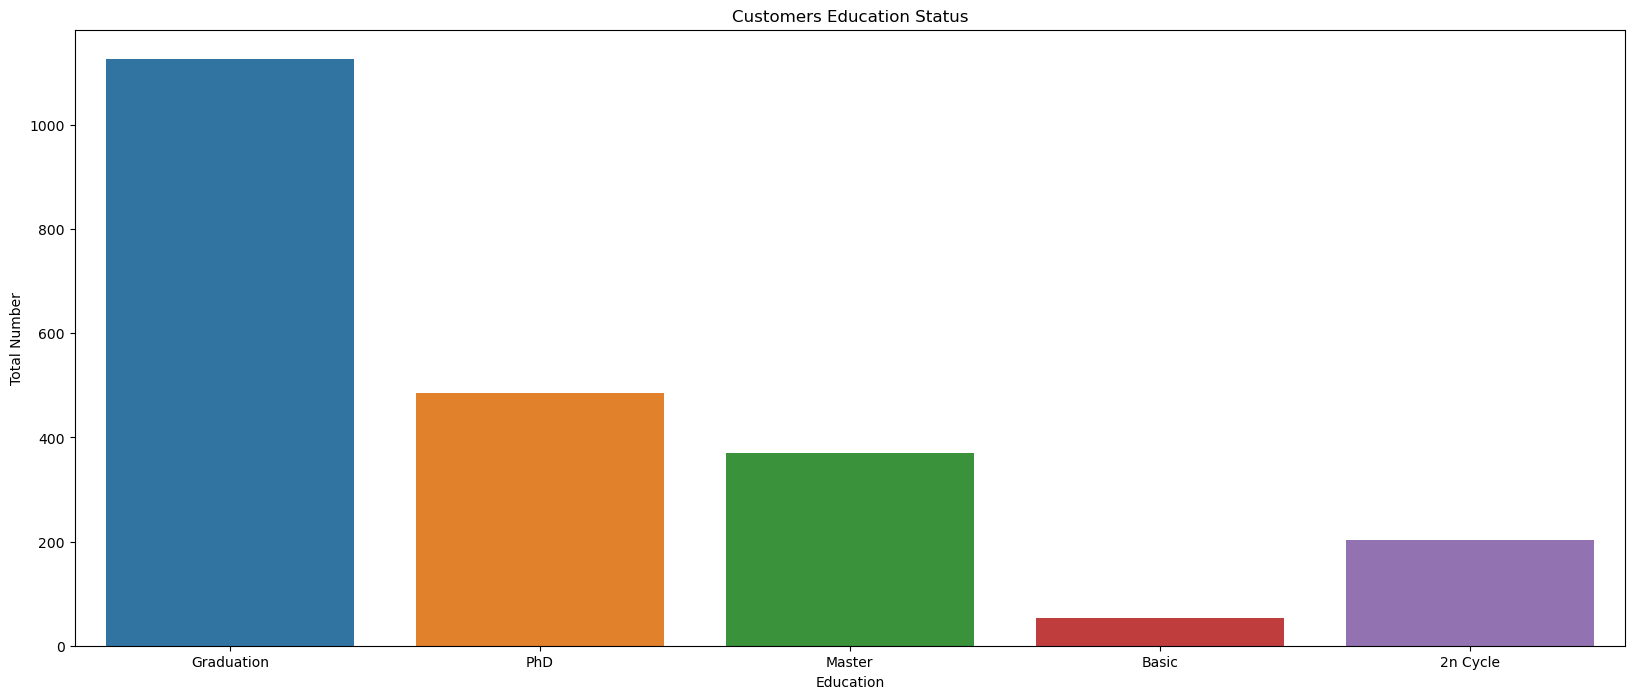

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(x='Education',data=df)
plt.ylabel("Total Number")
plt.title("Customers Education Status")
plt.show() # Majority of the CUstomers are Graduating

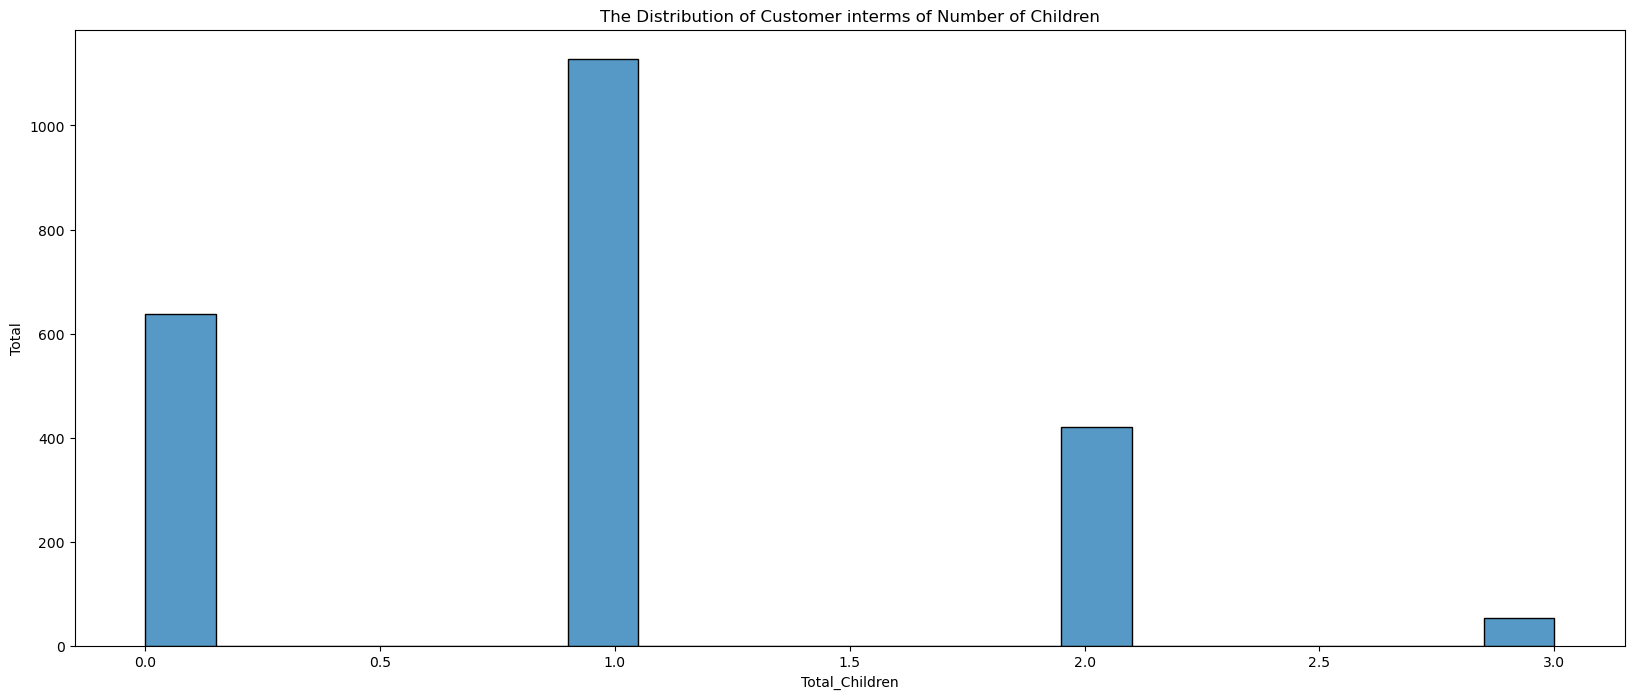

In [45]:
# Number of Children
plt.figure(figsize=(20,8))
sns.histplot(x='Total_Children',data=df,kde=False)
plt.ylabel('Total')
plt.title("The Distribution of Customer interms of Number of Children")
plt.show() # A majority of our customers  have one child

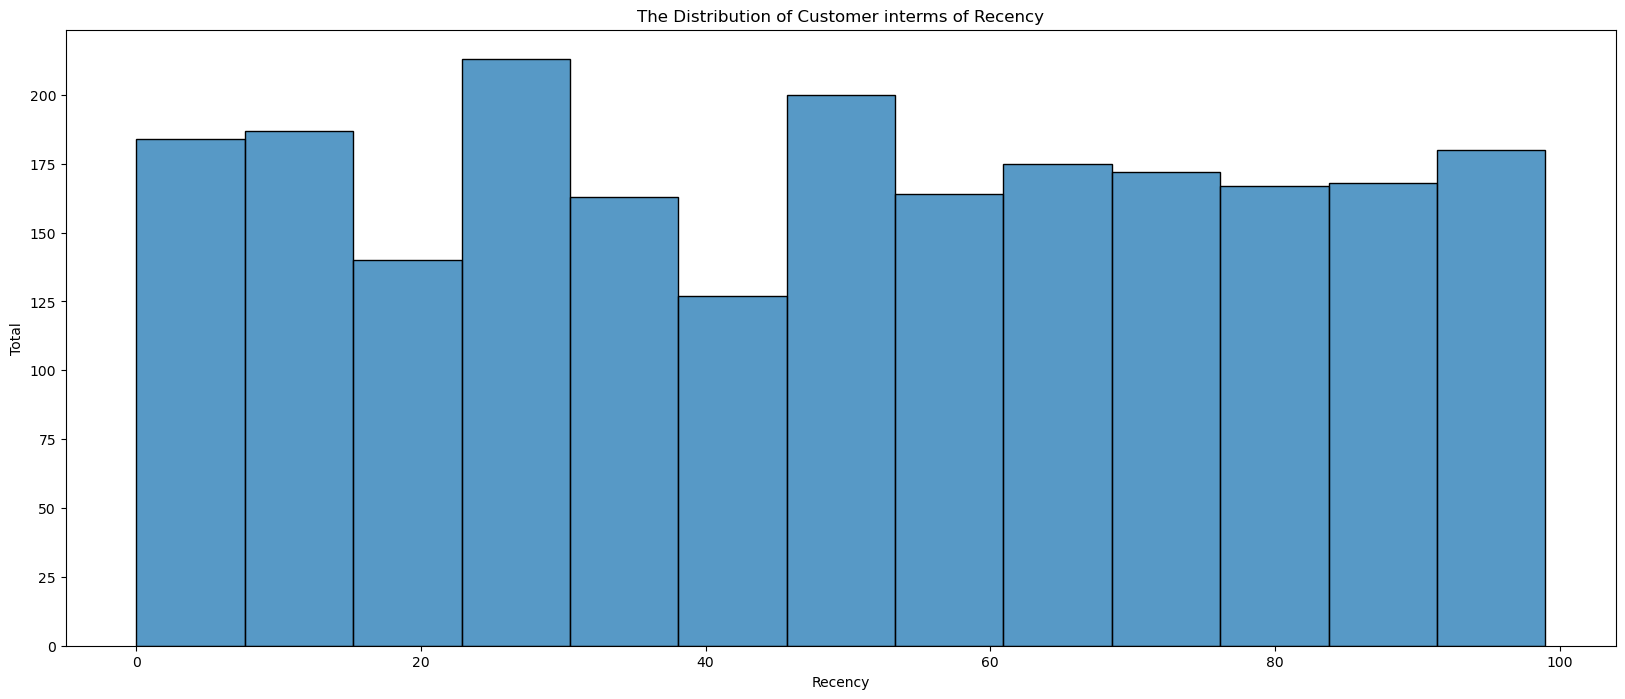

In [46]:
plt.figure(figsize=(20,8))
sns.histplot(x='Recency',data=df,kde=False)
plt.ylabel('Total')
plt.title("The Distribution of Customer interms of Recency")
plt.show() # A majority of our customers  have one child

In [47]:
import datetime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],infer_datetime_format=True)

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_3220\225562511.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],infer_datetime_format=True)
C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_3220\225562511.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],infer_datetime_format=True)
C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_3220\225562511.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],infer_datetime_format=True)
C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_3220\225562511.py:2: UserWarning: Parsing '13-03-2014' in

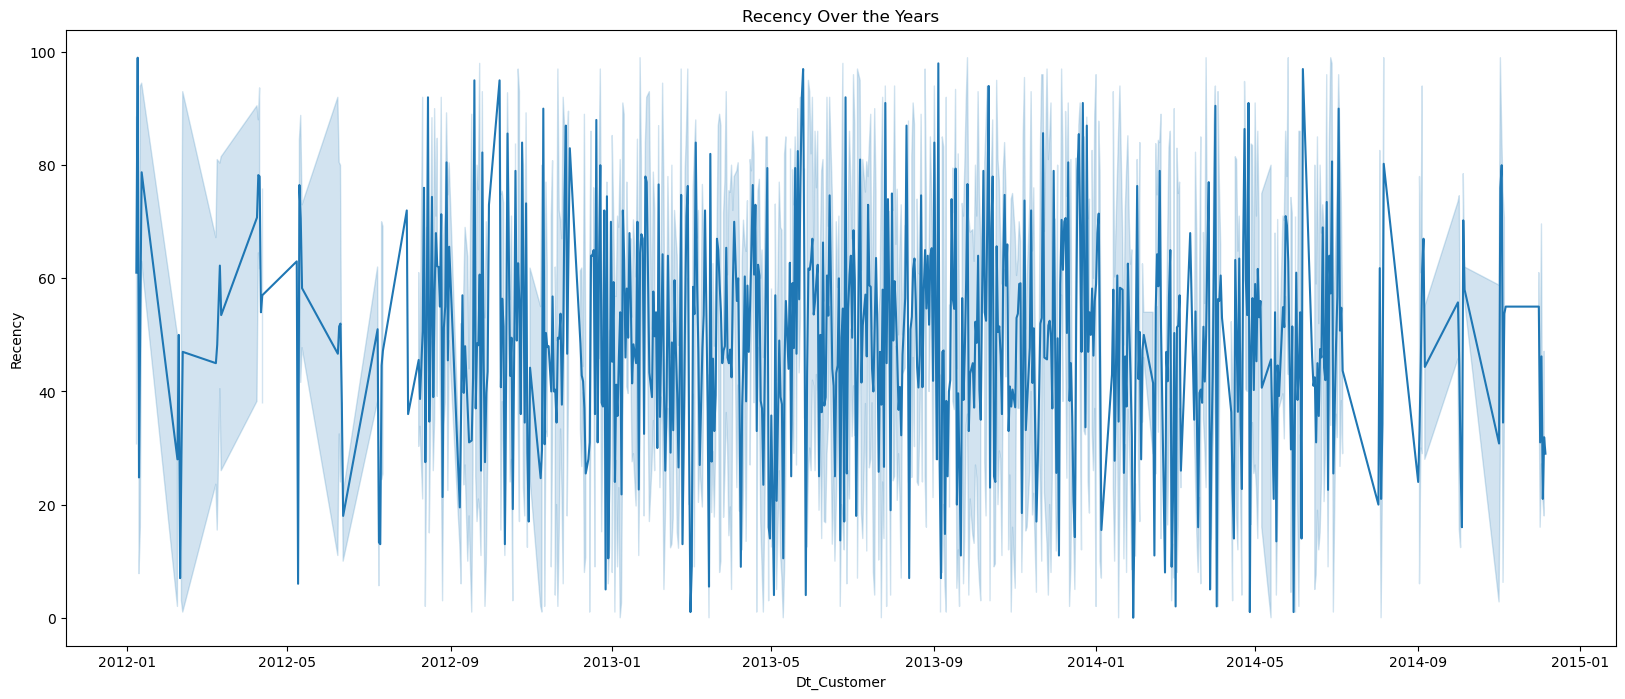

In [48]:
# Lets see the recency over the years 
plt.figure(figsize=(20,8))
sns.lineplot(x='Dt_Customer',y='Recency',data=df)
plt.title("Recency Over the Years")
plt.show()

# DATA PREPROCESSING 

In [49]:
categorical_columns = ['Education','Marital_Status']
lbl_encoder = {}
for column in categorical_columns:
    lbl_encoder = LabelEncoder()
    df[column] = lbl_encoder.fit_transform(df[column])

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,66,0
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,69,2
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,58,0
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,39,1
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,42,1


In [51]:
X = df.drop(['Dt_Customer'],axis=1)
X

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,0,3,11,1,66,0
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,69,2
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,0,3,11,0,58,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,39,1
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,0,0,0,0,0,3,11,0,56,1
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,0,0,1,0,0,3,11,0,77,3
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,1,0,0,0,0,3,11,0,42,0
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,0,0,0,0,0,3,11,0,67,1


In [52]:
# select our columns to cluster 
cluster_df =df[ ['Age','Income','Total_Children','Education','Marital_Status','Recency']]
cluster_df.columns =['Age','Income','Total_Children','Education','Marital_Status','Recency']
scaled_df = StandardScaler().fit_transform(cluster_df)
scaled_df = pd.DataFrame(scaled_df)

In [53]:
scaled_df

,0,1,2,3,4,5
0,0.985345,0.235327,-1.264505,-0.350141,0.251004,0.307039
1,1.235733,-0.235826,1.396361,-0.350141,0.251004,-0.383664
2,0.317643,0.773633,-1.264505,-0.350141,1.180340,-0.798086
3,-1.268149,-1.022732,0.065928,-0.350141,1.180340,-0.798086
4,-1.017761,0.241519,0.065928,1.428354,-0.678332,1.550305
...,...,...,...,...,...,...
2235,0.150717,0.358568,0.065928,-0.350141,-0.678332,-0.107383
2236,1.903435,0.470064,2.726794,1.428354,1.180340,0.237969
2237,-1.017761,0.189106,-1.264505,-0.350141,-1.607669,1.446700
2238,1.068807,0.679035,0.065928,0.539106,1.180340,-1.419719


# MODEL BUILDING

In [54]:
kmeans = KMeans(n_clusters= 4,max_iter=50)
kmeans.fit(cluster_df)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

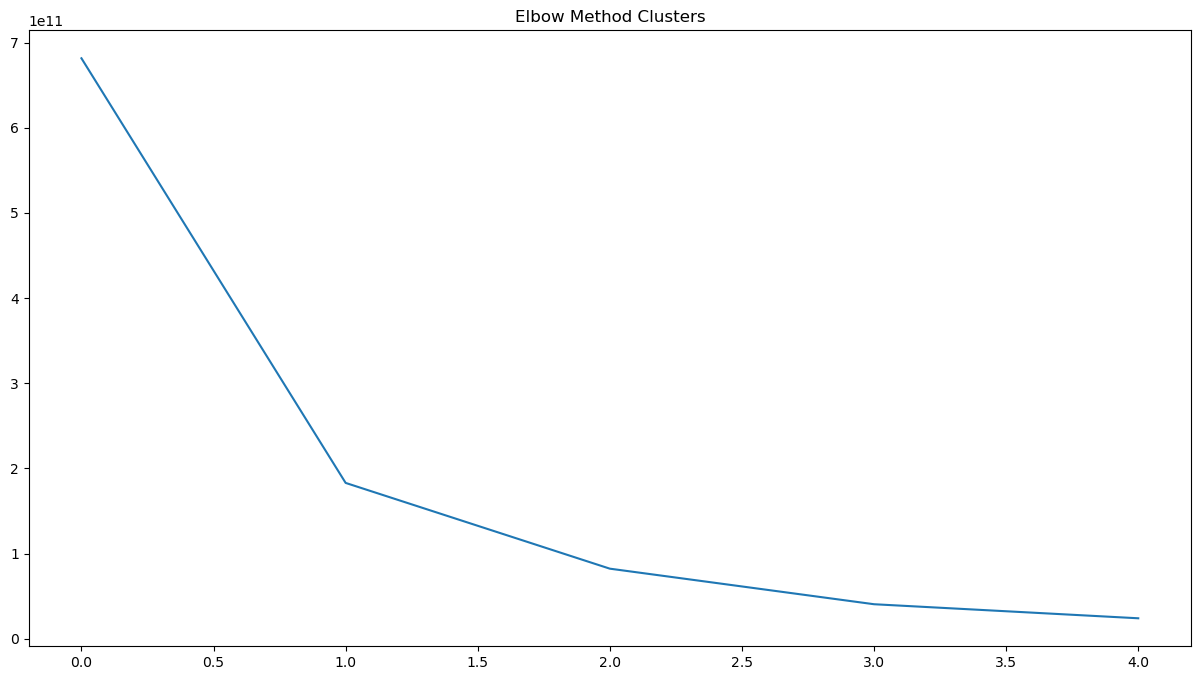

In [55]:
# Using Elbow Method to get the number of clusters
clust = []
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(cluster_df)
        clust.append(kmeans.inertia_)

plt.figure(figsize=(15,8)) 
plt.title("Elbow Method Clusters")
plt.plot(clust)
plt.show()

# Silhoute Analysis 
In silhoute analysis the value of the silhouete score ranges from -1 to 1 where a score point of 1 indicates that a data point 
is very close to the other data point


For Cluster2 the silhouette_score is 0.1434423819682224
For Cluster4 the silhouette_score is 0.1471217143144957
For Cluster6 the silhouette_score is 0.1477312887106676
For Cluster8 the silhouette_score is 0.14988214450112253
For Cluster10 the silhouette_score is 0.15604084479611316


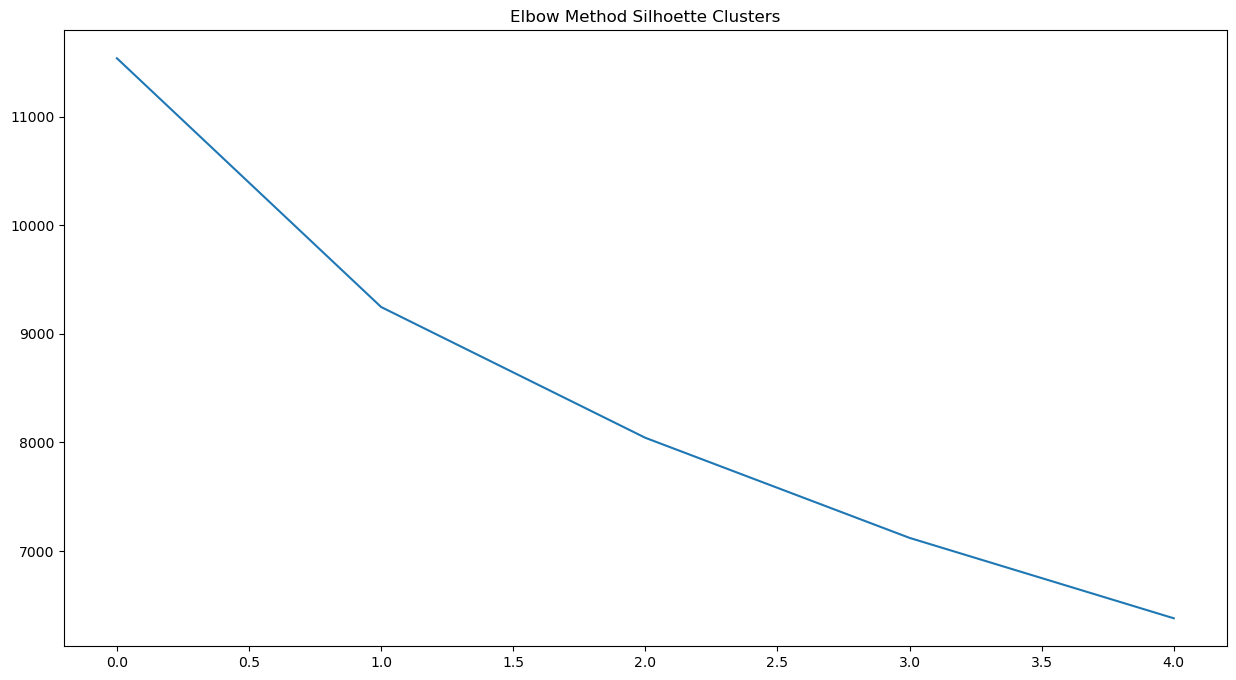

In [56]:
sill_h = []
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(scaled_df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_df,cluster_labels)
        sill_h.append(kmeans.inertia_)
        print(f"For Cluster{num_clusters} the silhouette_score is {silhouette_avg}")

plt.figure(figsize=(15,8)) 
plt.title("Elbow Method Silhoette Clusters")
plt.plot(sill_h)
plt.show()

In [57]:
# FINAL MODEL WITH K = 3 
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(cluster_df)
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [58]:
cluster_df['Cluster_Id'] = kmeans.labels_

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_3220\2789863072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster_Id'] = kmeans.labels_


In [59]:
cluster_df.head()

,Age,Income,Total_Children,Education,Marital_Status,Recency,Cluster_Id
0,66,58138.0,0,2,4,58,0
1,69,46344.0,2,2,4,38,0
2,58,71613.0,0,2,5,26,1
3,39,26646.0,1,2,5,26,3
4,42,58293.0,1,4,3,94,0


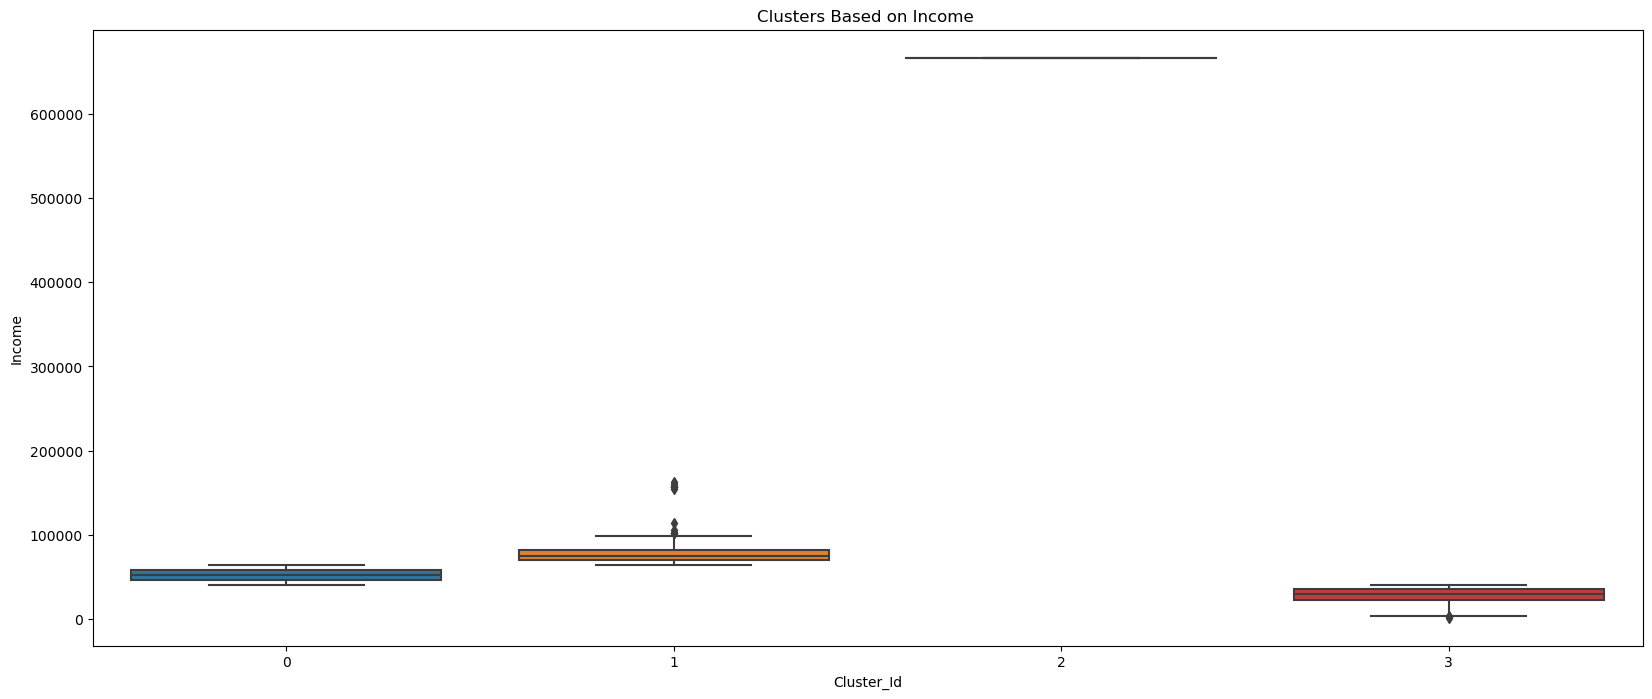

In [60]:
# BoxPlot to show cluster based on income
plt.figure(figsize=(20,8))
sns.boxplot(x='Cluster_Id',y='Income',data=cluster_df)
plt.title('Clusters Based on Income ')
plt.show()

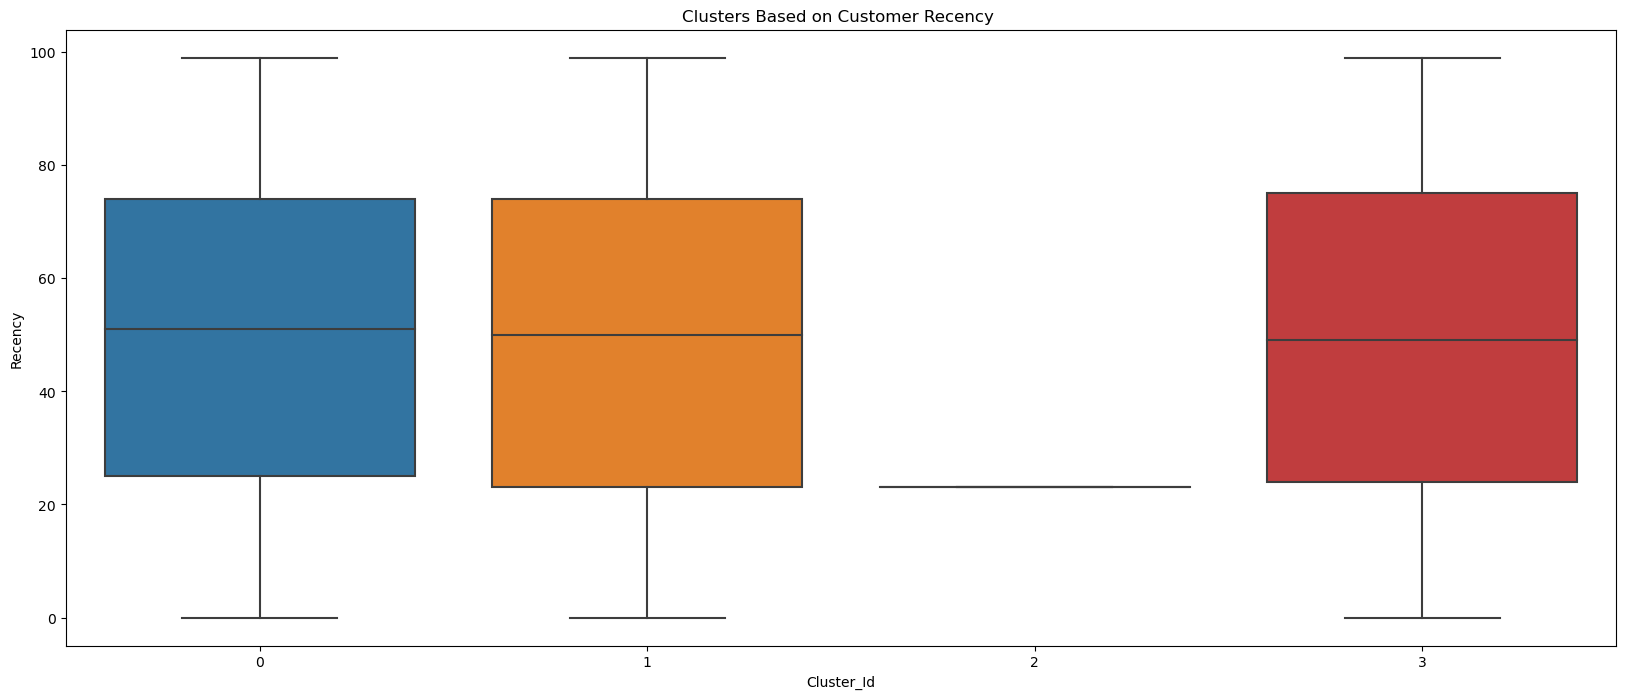

In [61]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Cluster_Id',y='Recency',data=cluster_df)
plt.title('Clusters Based on Customer Recency ')
plt.show()

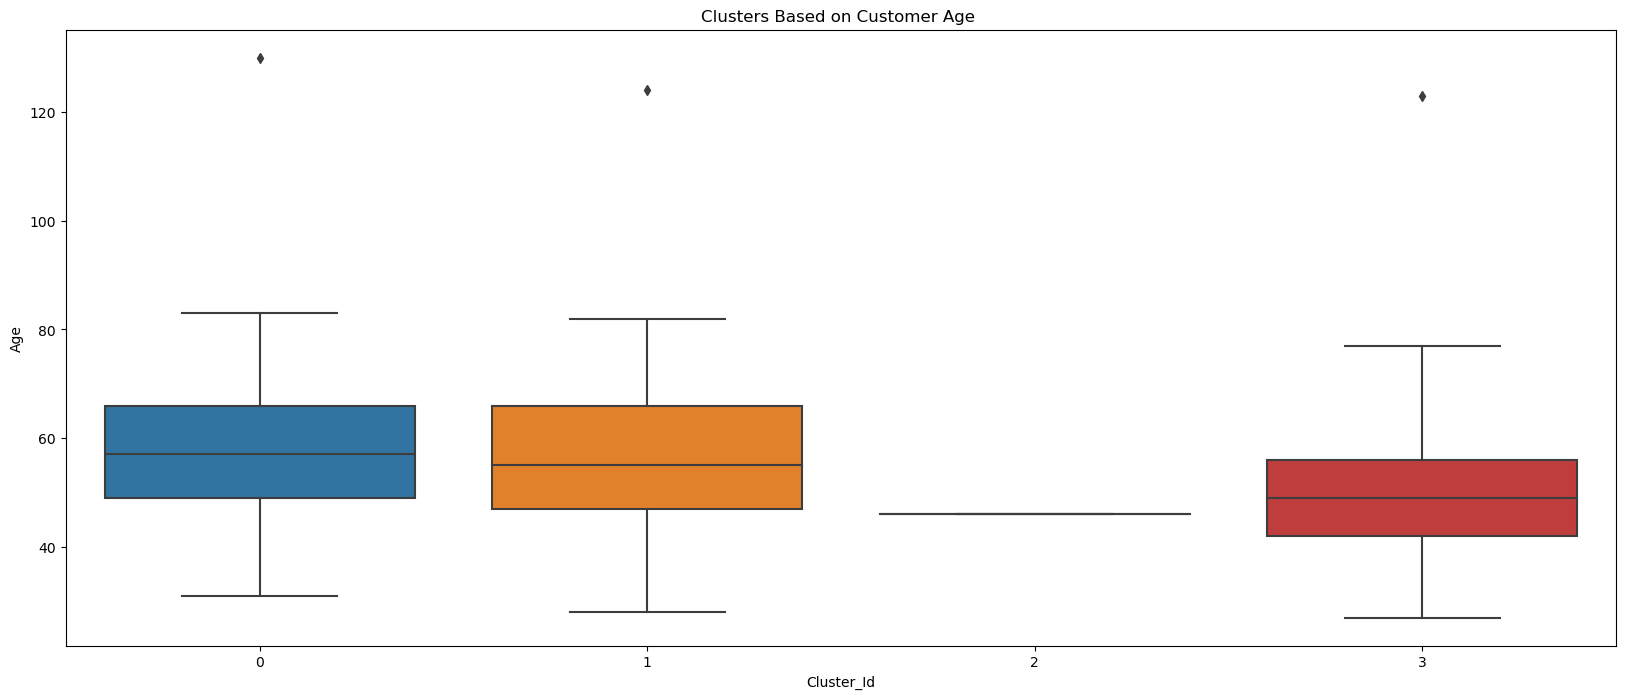

In [62]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Cluster_Id',y='Age',data=cluster_df)
plt.title('Clusters Based on Customer Age ')
plt.show()

THE OBJECTIVE WAS TO PLACE CUSTOMERS IN A CLUSTER ,WE ACHIEVED THAT AND FOUND THAT THE  CUSTOMERS CAN BE PLACE D IN 4 CLUSTERS 
WHERE EACH ONE IS UNIQUE.FOR THE INCOME CLUSTERING ,A MAJORITY OF OUR CUSTOMERS EARN 9000 SAME AS WHEN WE DID THE DATA ANALYSIS.
CLUSTERING IS AN UNSUPERVISED KIND OF MACHINE LEARNING AND THIS WAS A REALLY IMPRESSIVE PROJECT

# THE END